## Simulation results for cubic anisotropy

In [ ]:
from numpy import genfromtxt
import numpy as np
from math import factorial
from pylab import *
import urllib
import os
import matplotlib.pyplot as pl
from sklearn.metrics import mean_squared_error
pl.style.use('ggplot')
pl.rc('font',family='Arial')

In [94]:
def s_g(y, window_size, order, deriv=0, rate=1):
	order_range = range(order+1)
	half_window = (window_size -1) // 2
	# precompute coefficients
	b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
	m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
	# pad the signal at the extremes with
	 # values taken from the signal itself
	firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
	lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
	y = np.concatenate((firstvals, y, lastvals))
	return np.convolve( m[::-1], y, mode='valid')

## Import data

In [346]:
files = 31
points = 10000
data = np.zeros((points,files))
h = np.zeros((20, files))
dMdH = np.zeros((points-1, files))

data[:,0] = np.genfromtxt("chains/intoff_cubic_K-15_al1p3.csv",delimiter=',')[:,1]
data[:,1] = np.genfromtxt("chains/intoff_cubic_K-15_al1p2.csv",delimiter=',')[:,1]
data[:,2] = np.genfromtxt("chains/intoff_cubic_K-15_al1p1.csv",delimiter=',')[:,1]
data[:,3] = np.genfromtxt("chains/intoff_cubic_K-15.csv",delimiter=',')[:,1]
data[:,4] = np.genfromtxt("chains/intoff_cubic_K-15_alp95.csv",delimiter=',')[:,1]
data[:,5] = np.genfromtxt("chains/intoff_cubic_K-15_alp9.csv",delimiter=',')[:,1]
data[:,6] = np.genfromtxt("chains/intoff_cubic_K-15_alp85.csv",delimiter=',')[:,1]
data[:,7] = np.genfromtxt("chains/intoff_cubic_K-15_alp8.csv",delimiter=',')[:,1]
data[:,8] = np.genfromtxt("chains/intoff_cubic_K-15_alp75.csv",delimiter=',')[:,1]
data[:,9] = np.genfromtxt("chains/intoff_cubic_K-15_alp7.csv",delimiter=',')[:,1]
data[:,10] = np.genfromtxt("chains/intoff_cubic_K-15_alp65.csv",delimiter=',')[:,1]
data[:,11] = np.genfromtxt("chains/intoff_cubic_K-15_alp6.csv",delimiter=',')[:,1]
data[:,12] = np.genfromtxt("chains/intoff_cubic_K-15_alp55.csv",delimiter=',')[:,1]
data[:,13] = np.genfromtxt("chains/intoff_cubic_K-15_alp5.csv",delimiter=',')[:,1]
data[:,14] = np.genfromtxt("chains/intoff_cubic_K-15_alp45.csv",delimiter=',')[:,1]
data[:,15] = np.genfromtxt("chains/intoff_cubic_K-15_alp4.csv",delimiter=',')[:,1]
data[:,16] = np.genfromtxt("chains/intoff_cubic_K-15_alp35.csv",delimiter=',')[:,1]
data[:,17] = np.genfromtxt("chains/intoff_cubic_K-15_alp3.csv",delimiter=',')[:,1]
data[:,18] = np.genfromtxt("chains/intoff_cubic_K-15_alp2.csv",delimiter=',')[:,1]
data[:,19] = np.genfromtxt("chains/intoff_cubic_K-15_alp1.csv",delimiter=',')[:,1]

data[:,20] = np.genfromtxt("chains/intoff_cubic_K-15.csv",delimiter=',')[:,1]
data[:,21] = np.genfromtxt("chains/noint_cubic_K-15_n5_g1p2x.csv",delimiter=',')[:,1]
data[:,22] = np.genfromtxt("chains/noint_cubic_K-15_n5_g1p5x.csv",delimiter=',')[:,1]
data[:,23] = np.genfromtxt("chains/noint_cubic_K-15_n5_g2x.csv",delimiter=',')[:,1]
data[:,24] = np.genfromtxt("chains/noint_cubic_K-15_n5_g5x.csv",delimiter=',')[:,1]
data[:,25] = np.genfromtxt("chains/noint_cubic_K-15_n5_g10x.csv",delimiter=',')[:,1]
data[:,26] = np.genfromtxt("chains/noint_cubic_K-15_n5_g25x.csv",delimiter=',')[:,1]
data[:,27] = np.genfromtxt("chains/noint_cubic_K-15_n5_g50x.csv",delimiter=',')[:,1]
data[:,28] = np.genfromtxt("chains/noint_cubic_K-15_n5_g75x.csv",delimiter=',')[:,1]
data[:,29] = np.genfromtxt("chains/noint_cubic_K-15_n5_g100x.csv",delimiter=',')[:,1]
data[:,30] = np.genfromtxt("chains/noint_cubic_K-15_n5_g1p76.csv",delimiter=',')[:,1]

field = np.genfromtxt("chains/chain_uni_K5_n5_c.csv",delimiter=',')[:,0]

for f in range(files):
    dMdH[:,f] = np.diff(s_g(data[:,f],701,3))/np.diff(field)
    h[:,f] = abs(np.fft.fft(data[:,f])[1:21])*np.arange(1,21,1)

In [560]:
k_files = 20
z = 37
k_data = np.zeros((k_files,points,z))
k_h = np.zeros((k_files,20, z))
k_dMdH = np.zeros((k_files,points-1, z))

for x in range(k_files):
    q = x+1
    r = x+5
    k_data[x,:,0] = genfromtxt("0213-1D-2/1D_25nm_cubic_K-"+str(r)+".0.csv", delimiter=',') [points:,1]
    k_data[x,:,1] = genfromtxt("0213-1D-2/1D_25nm_cubic_K-"+str(r+20)+".0.csv", delimiter=',')[points:,1]
    k_data[x,:,2] = genfromtxt("0213-1D-4/1D_25nm_cubic_K-15_avg_c5e18x"+str(q)+".0.csv", delimiter=',')[points:,1]
    k_data[x,:,3] = genfromtxt("0213-1D-4/1D_25nm_cubic_K-15_avg_c5e20x"+str(q)+".0.csv", delimiter=',') [points:,1]
    k_data[x,:,4] = genfromtxt("0213-1D-4/1D_25nm_cubic_K-15_avg_c5e19x"+str(q)+".0.csv", delimiter=',') [points:,1]
    k_data[x,:,5] = genfromtxt("0213-1D-4/21nm_cubic_K-15_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,6] = genfromtxt("0213-1D-4/21nm_cubic_K-8_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,7] = genfromtxt("0213-1D-4/21nm_cubic_K-4_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,8] = genfromtxt("0213-1D-4/1D_25nm_cubic_HK1_K-"+str(r)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,9] = genfromtxt("0213-1D-4/27nm_cubic_K-15_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,10] = genfromtxt("0213-1D-4/27nm_cubic_K-8_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,11] = genfromtxt("0213-1D-4/21nm_cubic_K-20_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,12] = genfromtxt("0213-1D-4/21nm_cubic_HK1_K-"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,13] = genfromtxt("0213-1D-4/21nm_cubic_HK1_K-"+str(20+q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,14] = genfromtxt("0213-1D-4/21nm_cubic_HK2_K-"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,15] = genfromtxt("0213-1D-4/21nm_cubic_HK2_K-"+str(20+q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,16] = genfromtxt("0213-1D-4/27nm_cubic_HK1_K-"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,17] = genfromtxt("0213-1D-4/27nm_cubic_HK1_K-"+str(20+q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,18] = genfromtxt("0213-1D-4/27nm_cubic_HK2_K-"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,19] = genfromtxt("0213-1D-4/27nm_cubic_HK2_K-"+str(20+q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,20] = genfromtxt("0213-1D-4/1D_25nm_cubic_HK2_K-"+str(r)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,21] = genfromtxt("0213-1D-4/1D_25nm_cubic_HK2_K-"+str(20+r)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,22] = genfromtxt("0213-1D-4/27nm_cubic_K-25_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,23] = genfromtxt("0213-1D-4/27nm_cubic_K-30_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,24] = genfromtxt("0213-1D-4/21nm_cubic_K-25_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,25] = genfromtxt("0213-1D-4/21nm_cubic_K-30_gx"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,26] = genfromtxt("0213-1D-4/21nm_cubic_HK1_alp8_K-"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,27] = genfromtxt("0213-1D-4/27nm_cubic_HK1_alp8_K-"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,28] = genfromtxt("0213-1D-4/1D_25nm_cubic_HK1_K-"+str(20+r)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,29] = genfromtxt("0213-1D-4/27nm_cubic_thermoff_K-"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,30] = genfromtxt("0213-1D-4/27nm_cubic_thermtest_K-"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,31] = genfromtxt("0213-1D-4/1D_25nm_uni_HK_K"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,32] = genfromtxt("0213-1D-4/1D_25nm_uni_HK_K"+str(20+q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,33] = genfromtxt("0213-1D-4/21nm_u_HK_K"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,34] = genfromtxt("0213-1D-4/27nm_cubic_K-25_g13x_c5x"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,35] = genfromtxt("0213-1D-4/27nm_cubic_K-25_g13x_test_c5x"+str(q)+".0.csv", delimiter=',') [points:,1]   
    k_data[x,:,36] = genfromtxt("0213-1D-4/27nm_cubic_K-25_g13x_Ksig05x"+str(q)+".0.csv", delimiter=',') [points:,1]   
    
    for hh in range(z):
        k_h[x,:,hh] = abs(np.fft.fft(k_data[x,:,hh])[1:21])*np.arange(1,21,1)

    
k_data_avg = np.zeros((k_files,int(points/100),z))
k_dMdH_avg = np.zeros((k_files,int(points/100)-1,z))
field_avg = np.zeros(int(points/100))

for f in range(k_files):
    for p in range(int(points/100)):
        for q in range(z):
            k_data_avg[f,p,q] = np.mean(k_data[f,100*p:100*(p+1),q])
            
for p in range(int(points/100)):
    field_avg[p] = field[p*100]
    
for f in range(k_files):
    for zz in range(z):
        k_dMdH[f,:,zz] = np.diff(s_g(k_data[f,:,zz],701,3))/np.diff(field)
        k_dMdH_avg[f,:,zz] = np.diff(s_g(k_data_avg[f,:,zz],11,3))/np.diff(field_avg)

In [ ]:
AT99 = genfromtxt('MPS/AT-99_MH.csv', delimiter=',')[1:,:]
AT133 = genfromtxt('MPS/AT-133.csv', delimiter=',')[1:,:]
A_MH = genfromtxt('MPS/A-MvH.csv', delimiter=',')[1:,:]
B_MH = genfromtxt('MPS/B-MvH.csv', delimiter=',')[1:,:]
A_MPS = genfromtxt('MPS/A-MPS_dat.csv', delimiter=',')[1:,:]
B_MPS = genfromtxt('MPS/B-MPS_dat.csv', delimiter=',')[1:,:]

In [338]:
al = np.array([.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.1,1.2,1.3])
g = np.array([1,1.2,1.5,2,5,10,25,50,75,100,135])
k_vals = np.arange(5,45,1)
k_vals2 = np.arange(1,41,1)
ints1 = np.arange(5*10e18, 5*21*10e18,5*10e18)
ints4 = np.arange(5*10e19, 5*21*10e19,5*10e19)
ints2 = np.arange(5*10e20, 5*21*10e20,5*10e20)
ints3 = np.arange(5*10e22, 5*21*10e22,5*10e22)

### Changing alpha

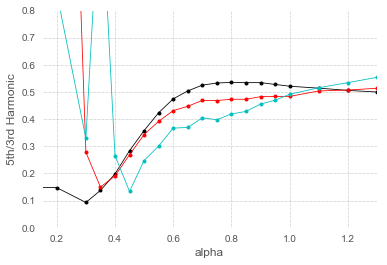

In [418]:
fig, ax = pl.subplots()

ax.plot(al[::-1],h[4,:20]/h[2,:20], linestyle = '-', color='black',lw=0.8,marker='.')
ax.plot(al[::-1],h[6,:20]/h[4,:20], linestyle = '-', color='red',lw=0.8,marker='.')
ax.plot(al[::-1],h[8,:20]/h[6,:20], linestyle = '-', color='c',lw=0.8,marker='.')
ylabel('5th/3rd Harmonic')
xlabel('alpha',fontname="Arial")
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
#ax.grid(which = "minor",lw=0.5, linestyle="dotted",color = "black")
xlim([0.15,1.3])
ylim([0,.8])
ax.set_facecolor('white')

show()

### Changing gamma

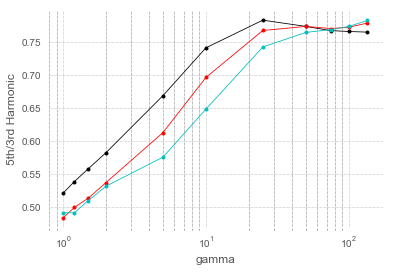

In [417]:
fig, ax = pl.subplots()
ax.semilogx(g,h[4,20:]/h[2,20:], linestyle = '-', color='black',lw=0.8,marker='.')
ax.semilogx(g,h[6,20:]/h[4,20:], linestyle = '-', color='red',lw=0.8,marker='.')
ax.semilogx(g,h[8,20:]/h[6,20:], linestyle = '-', color='c',lw=0.8,marker='.')
ylabel('5th/3rd Harmonic')
xlabel('gamma',fontname="Arial")
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax.grid(which = "minor",lw=0.5, linestyle="dotted",color = "black")
ax.set_facecolor('white')
show()

### Changing K

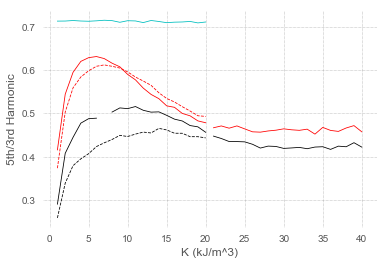

In [516]:
fig, ax = pl.subplots()

ax.plot(k_vals2[:20],k_h[:,4,12]/k_h[:,2,12], linestyle = '-', color='black',lw=0.8)
ax.plot(k_vals2[20:],k_h[:,4,13]/k_h[:,2,13], linestyle = '-', color='black',lw=0.8)
ax.plot(k_vals2[:20],k_h[:,4,26]/k_h[:,2,26], linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(k_vals2[:20],k_h[:,6,12]/k_h[:,4,12], linestyle = '-', color='black',lw=0.8)
#ax.plot(k_vals2[20:],k_h[:,6,13]/k_h[:,4,13], linestyle = '-', color='black',lw=0.8)
#ax.plot(k_vals2[:20],k_h[:,8,12]/k_h[:,6,12], linestyle = '-', color='c',lw=0.8)
#ax.plot(k_vals2[20:],k_h[:,8,13]/k_h[:,6,13], linestyle = '-', color='c',lw=0.8)
#ax.plot(k_vals2[:20],k_h[:,4,14]/k_h[:,2,14], linestyle = '-', color='black',lw=0.8)
#ax.plot(k_vals2[20:],k_h[:,4,15]/k_h[:,2,15], linestyle = '-', color='black',lw=0.8)
ax.plot(k_vals2[:20],k_h[:,4,16]/k_h[:,2,16], linestyle = '-', color='red',lw=0.8)
ax.plot(k_vals2[20:],k_h[:,4,17]/k_h[:,2,17], linestyle = '-', color='red',lw=0.8)
ax.plot(k_vals2[:20],k_h[:,4,27]/k_h[:,2,27], linestyle = 'dashed', color='red',lw=0.8)
#ax.plot(k_vals2[:20],k_h[:,6,16]/k_h[:,4,16], linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(k_vals2[20:],k_h[:,6,17]/k_h[:,4,17], linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(k_vals2[:20],k_h[:,8,16]/k_h[:,6,16], linestyle = 'dashed', color='c',lw=0.8)
#ax.plot(k_vals2[20:],k_h[:,8,17]/k_h[:,6,17], linestyle = 'dashed', color='c',lw=0.8)
#ax.plot(k_vals2[:20],k_h[:,4,18]/k_h[:,2,18], linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(k_vals2[20:],k_h[:,4,19]/k_h[:,2,19], linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(k_vals[:20],k_h[:,4,8]/k_h[:,2,8], linestyle = '-', color='c',lw=0.8)
#ax.plot(k_vals[20:],k_h[:,4,28]/k_h[:,2,28], linestyle = '-', color='c',lw=0.8)
#ax.plot(k_vals[:20],k_h[:,4,20]/k_h[:,2,20], linestyle = 'dotted', color='black',lw=0.8)
#ax.plot(k_vals[20:],k_h[:,4,21]/k_h[:,2,21], linestyle = 'dotted', color='black',lw=0.8)
#ax.plot(k_vals[20:],k_h[:,4,7]/k_h[:,2,7], linestyle = 'dashed', color='black',lw=0.8)
ax.plot(k_vals2[:20],k_h[:,4,29]/k_h[:,2,29], linestyle = '-', color='c',lw=0.8)
ylabel('5th/3rd Harmonic')
xlabel('K (kJ/m^3)')
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
#ax.grid(which = "minor",lw=0.5, linestyle="dotted",color = "black")
ax.set_facecolor('white')
#xlim([5,25])
#ylim([.1,.5])


show()

### Changing K (different gamma)

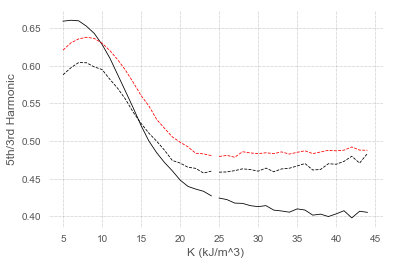

In [513]:
fig, ax = pl.subplots()

ax.plot(k_vals[:20],k_h[:,4,0]/k_h[:,2,0], linestyle = '-', color='black',lw=0.8)
ax.plot(k_vals[20:],k_h[:,4,1]/k_h[:,2,1], linestyle = '-', color='black',lw=0.8)
ax.plot(k_vals[:20],k_h[:,4,8]/k_h[:,2,8], linestyle = 'dashed', color='black',lw=0.8)
ax.plot(k_vals[20:],k_h[:,4,28]/k_h[:,2,28], linestyle = 'dashed', color='black',lw=0.8)
ax.plot(k_vals[:20],k_h[:,4,20]/k_h[:,2,20], linestyle = 'dashed', color='red',lw=0.8)
ax.plot(k_vals[20:],k_h[:,4,21]/k_h[:,2,21], linestyle = 'dashed', color='red',lw=0.8)
#ax.plot(k_vals2[:20],k_h[:,4,11]/k_h[:,2,11], linestyle = 'dashed', color='red',lw=0.8)
#ax.plot(k_vals[20:],k_h[:,4,7]/k_h[:,2,7], linestyle = 'dashed', color='black',lw=0.8)

ylabel('5th/3rd Harmonic')
xlabel('K (kJ/m^3)')
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
#ax.grid(which = "minor",lw=0.5, linestyle="dotted",color = "black")
ax.set_facecolor('white')
#xlim([5,25])
#ylim([.1,.5])

#ax1 = ax.twiny()
#ax1.plot(al[:10],h[4,:10]/h[2,:10], linestyle = '-', color='red',lw=0.8)
#ax1.tick_params('x', colors='r')
#ax1.set_xlabel('alpha', color='r')

show()

### Gamma as a function of K

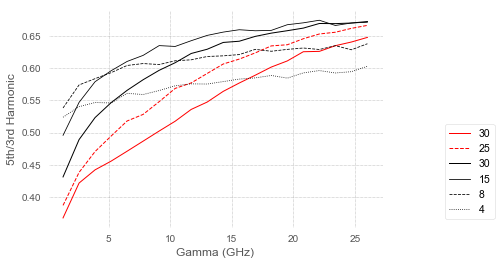

In [396]:
fig, ax = pl.subplots()

#ax.set_title('21.9 nm')

gg = 1.76e11*4*np.arange(1000,21000,1000)/(6*np.pi*420000)
gg /= 1e9
ax.plot(1.3*np.arange(1,21,1),k_h[:,4,25]/k_h[:,2,25], linestyle = '-', color='red',lw=1)
ax.plot(1.3*np.arange(1,21,1),k_h[:,4,24]/k_h[:,2,24], linestyle = 'dashed', color='red',lw=1)
ax.plot(1.3*np.arange(1,21,1),k_h[:,4,11]/k_h[:,2,11], linestyle = '-', color='black',lw=1)
ax.plot(1.3*np.arange(1,21,1),k_h[:,4,5]/k_h[:,2,5], linestyle = '-', color='black',lw=0.8)
ax.plot(1.3*np.arange(1,21,1),k_h[:,4,6]/k_h[:,2,6], linestyle = 'dashed', color='black',lw=0.8)
ax.plot(1.3*np.arange(1,21,1),k_h[:,4,7]/k_h[:,2,7], linestyle = 'dotted', color='black',lw=0.8)
#ax.plot(1.3*np.arange(1,21,1),k_h[:,4,9]/k_h[:,2,9], linestyle = '-', color='red',lw=0.8)
#ax.plot(1.3*np.arange(1,21,1),k_h[:,4,10]/k_h[:,2,10], linestyle = 'dashed', color='red',lw=0.8)
#ax.plot(gg,k_h[:,4,12]/k_h[:,2,12], linestyle = '-', color='c',lw=0.8)
#ax.plot(1.3*np.arange(1,21,1),k_h[:,6,25]/k_h[:,4,25], linestyle = '-', color='red',lw=.7)
#ax.plot(1.3*np.arange(1,21,1),k_h[:,6,24]/k_h[:,4,24], linestyle = 'dashed', color='red',lw=.7)
#ax.plot(1.3*np.arange(1,21,1),k_h[:,6,11]/k_h[:,4,11], linestyle = '-', color='black',lw=.7)
#ax.plot(1.3*np.arange(1,21,1),k_h[:,6,5]/k_h[:,4,5], linestyle = '-', color='black',lw=0.5)
#ax.plot(1.3*np.arange(1,21,1),k_h[:,6,6]/k_h[:,4,6], linestyle = 'dashed', color='black',lw=0.5)
#ax.plot(1.3*np.arange(1,21,1),k_h[:,6,7]/k_h[:,4,7], linestyle = 'dotted', color='black',lw=0.5)


legend = ax.legend(['30','25','30','15','8','4'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')

ylabel('5th/3rd Harmonic')
xlabel('Gamma (GHz)',fontname="Arial")
#yticks(fontname = "Arial")
xticks(fontname = "Arial")
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
#ax.grid(which = "minor",lw=0.5, linestyle="dotted",color = "black")
ax.set_facecolor('white')
show()

### Interactions

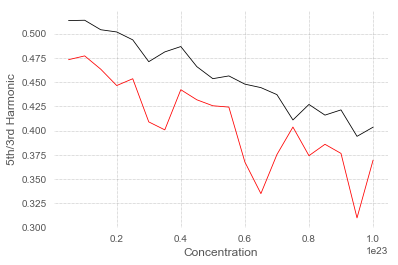

In [405]:
fig, ax = pl.subplots()

#ax.plot(ints1,k_h[:,4,2]/k_h[:,2,2], linestyle = '-', color='black',lw=0.8)
ax.plot(ints2,k_h[:,4,3]/k_h[:,2,3], linestyle = '-', color='black',lw=0.8)
ax.plot(ints2,k_h[:,6,3]/k_h[:,4,3], linestyle = '-', color='red',lw=0.8)
#ax.plot(ints4,k_h[:,4,4]/k_h[:,2,4], linestyle = '-', color='black',lw=0.8)
ylabel('5th/3rd Harmonic')
xlabel('Concentration',fontname="Arial")
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
#ax.grid(which = "minor",lw=0.5, linestyle="dotted",color = "black")
ax.set_facecolor('white')
show()

### Changing gamma -- stays within outer curve

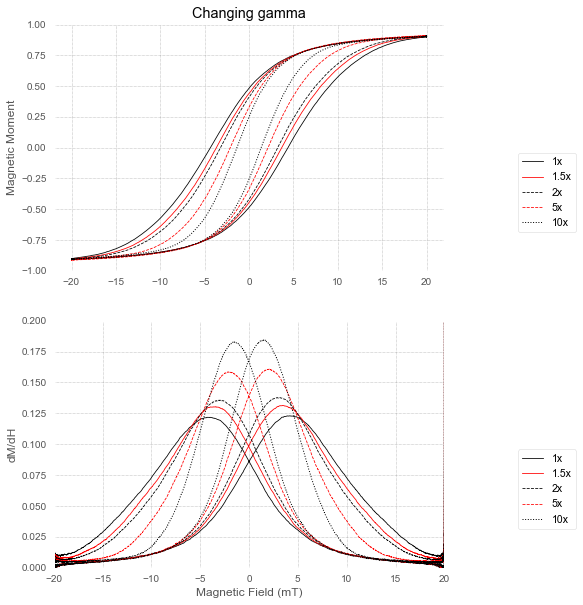

In [132]:
fig, (ax1, ax2) = pl.subplots(figsize=(7, 10),nrows=2)

ax1.set_title("Changing gamma")
ax1.plot(field,data[:,3], linestyle = '-', color='black',lw=0.8)
#ax.plot(field,k_data[0,:,0], linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(field,k_data[0,:,1], linestyle = 'dashed', color='red',lw=0.8)
ax1.plot(field,data[:,11], linestyle = '-', color='red',lw=0.8)
ax1.plot(field,data[:,12], linestyle = 'dashed', color='black',lw=0.8)
ax1.plot(field,data[:,13], linestyle = 'dashed', color='red',lw=0.8)
ax1.plot(field,data[:,14], linestyle = 'dotted', color='black',lw=1)
legend = ax1.legend(['1x','1.5x','2x','5x','10x'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ax1.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax1.set_axisbelow(True)
ax1.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax1.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax1.set_facecolor('white')

ax2.plot(field[1:],dMdH[:,3], linestyle = '-', color='black',lw=0.8)
#ax.plot(field,k_data[0,:,0], linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(field,k_data[0,:,1], linestyle = 'dashed', color='red',lw=0.8)
ax2.plot(field[1:],dMdH[:,11], linestyle = '-', color='red',lw=0.8)
ax2.plot(field[1:],dMdH[:,12], linestyle = 'dashed', color='black',lw=0.8)
ax2.plot(field[1:],dMdH[:,13], linestyle = 'dashed', color='red',lw=0.8)
ax2.plot(field[1:],dMdH[:,14], linestyle = 'dotted', color='black',lw=1)
legend = ax2.legend(['1x','1.5x','2x','5x','10x'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ylabel('dM/dH')
xlabel('Magnetic Field (mT)')
ylim(0,.2)
xlim(-20,20)
ax2.set_axisbelow(True)
ax2.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax2.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax2.set_facecolor('white')
show()

### Changing alpha -- changes shape and lowers Ms

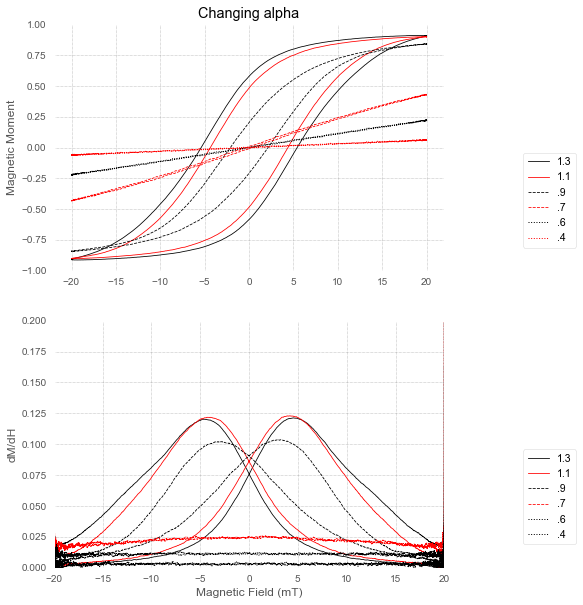

In [505]:
fig, (ax1, ax2) = pl.subplots(figsize=(7, 10),nrows=2)

ax1.set_title("Changing alpha")
ax1.plot(field,data[:,0], linestyle = '-', color='black',lw=0.8)
ax1.plot(field,data[:,3], linestyle = '-', color='red',lw=0.8)
ax1.plot(field,data[:,10], linestyle = 'dashed', color='black',lw=0.8)
ax1.plot(field,data[:,17], linestyle = 'dashed', color='red',lw=0.8)
ax1.plot(field,data[:,18], linestyle = 'dotted', color='black',lw=1)
ax1.plot(field,data[:,19], linestyle = 'dotted', color='red',lw=1)
legend = ax1.legend(['1.3','1.1','.9','.7','.6','.4'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ax1.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax1.set_axisbelow(True)
ax1.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax1.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax1.set_facecolor('white')

ax2.plot(field[1:],dMdH[:,0], linestyle = '-', color='black',lw=0.8)
#ax.plot(field,k_data[0,:,0], linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(field,k_data[0,:,1], linestyle = 'dashed', color='red',lw=0.8)
ax2.plot(field[1:],dMdH[:,3], linestyle = '-', color='red',lw=0.8)
ax2.plot(field[1:],dMdH[:,10], linestyle = 'dashed', color='black',lw=0.8)
ax2.plot(field[1:],dMdH[:,17], linestyle = 'dashed', color='red',lw=0.8)
ax2.plot(field[1:],dMdH[:,18], linestyle = 'dotted', color='black',lw=1)
ax2.plot(field[1:],dMdH[:,19], linestyle = 'dotted', color='black',lw=1)
legend = ax2.legend(['1.3','1.1','.9','.7','.6','.4'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ylabel('dM/dH')
xlabel('Magnetic Field (mT)')
ylim(0,.2)
xlim(-20,20)
ax2.set_axisbelow(True)
ax2.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax2.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax2.set_facecolor('white')
show()

### Changing K

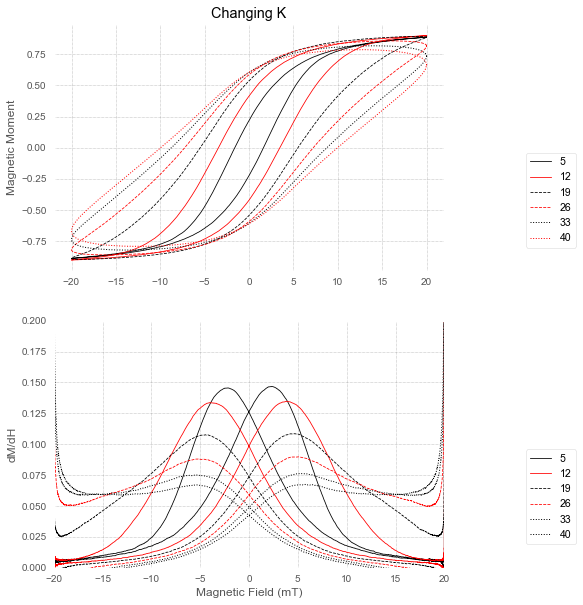

In [136]:
fig, (ax1, ax2) = pl.subplots(figsize=(7, 10),nrows=2)

ax1.set_title("Changing K")

ax1.plot(field,k_data[0,:,0], linestyle = '-', color='black',lw=0.8)
ax1.plot(field,k_data[7,:,0], linestyle = '-', color='red',lw=0.8)
ax1.plot(field,k_data[14,:,0], linestyle = 'dashed', color='black',lw=0.8)
ax1.plot(field,k_data[1,:,1], linestyle = 'dashed', color='red',lw=0.8)
ax1.plot(field,k_data[8,:,1], linestyle = 'dotted', color='black',lw=1)
ax1.plot(field,k_data[15,:,1], linestyle = 'dotted', color='red',lw=1)
legend = ax1.legend(['5','12','19','26','33','40'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ax1.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax1.set_axisbelow(True)
ax1.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax1.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax1.set_facecolor('white')

ax2.plot(field[1:],k_dMdH[0,:,0], linestyle = '-', color='black',lw=0.8)
ax2.plot(field[1:],k_dMdH[7,:,0], linestyle = '-', color='red',lw=0.8)
ax2.plot(field[1:],k_dMdH[14,:,0], linestyle = 'dashed', color='black',lw=0.8)
ax2.plot(field[1:],k_dMdH[1,:,1], linestyle = 'dashed', color='red',lw=0.8)
ax2.plot(field[1:],k_dMdH[8,:,1], linestyle = 'dotted', color='black',lw=1)
ax2.plot(field[1:],k_dMdH[15,:,1], linestyle = 'dotted', color='black',lw=1)
legend = ax2.legend(['5','12','19','26','33','40'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ylabel('dM/dH')
xlabel('Magnetic Field (mT)')
ylim(0,.2)
xlim(-20,20)
ax2.set_axisbelow(True)
ax2.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax2.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax2.set_facecolor('white')

show()

### interactions

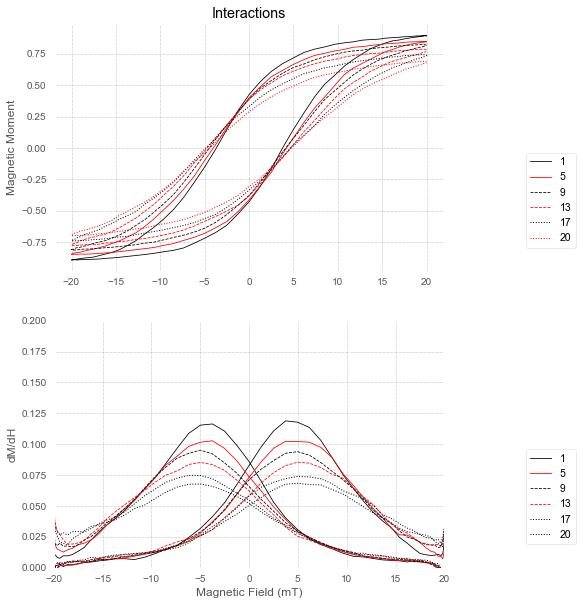

In [152]:
fig, (ax1, ax2) = pl.subplots(figsize=(7, 10),nrows=2)

ax1.set_title("Interactions")

ax1.plot(field_avg,k_data_avg[0,:,3], linestyle = '-', color='black',lw=0.8)
ax1.plot(field_avg,k_data_avg[4,:,3], linestyle = '-', color='red',lw=0.8)
ax1.plot(field_avg,k_data_avg[8,:,3], linestyle = 'dashed', color='black',lw=0.8)
ax1.plot(field_avg,k_data_avg[12,:,3], linestyle = 'dashed', color='red',lw=0.8)
ax1.plot(field_avg,k_data_avg[16,:,3], linestyle = 'dotted', color='black',lw=1)
ax1.plot(field_avg,k_data_avg[19,:,3], linestyle = 'dotted', color='red',lw=1)
legend = ax1.legend(['1','5','9','13','17','20'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ax1.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax1.set_axisbelow(True)
ax1.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax1.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax1.set_facecolor('white')

ax2.plot(field_avg[1:],k_dMdH_avg[0,:,3], linestyle = '-', color='black',lw=0.8)
ax2.plot(field_avg[1:],k_dMdH_avg[4,:,3], linestyle = '-', color='red',lw=0.8)
ax2.plot(field_avg[1:],k_dMdH_avg[8,:,3], linestyle = 'dashed', color='black',lw=0.8)
ax2.plot(field_avg[1:],k_dMdH_avg[12,:,3], linestyle = 'dashed', color='red',lw=0.8)
ax2.plot(field_avg[1:],k_dMdH_avg[16,:,3], linestyle = 'dotted', color='black',lw=1)
ax2.plot(field_avg[1:],k_dMdH_avg[19,:,3], linestyle = 'dotted', color='black',lw=1)
legend = ax2.legend(['1','5','9','13','17','20'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ylabel('dM/dH')
xlabel('Magnetic Field (mT)')
ylim(0,.2)
xlim(-20,20)
ax2.set_axisbelow(True)
ax2.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax2.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax2.set_facecolor('white')
show()

### Changing K (gamma as function of K)

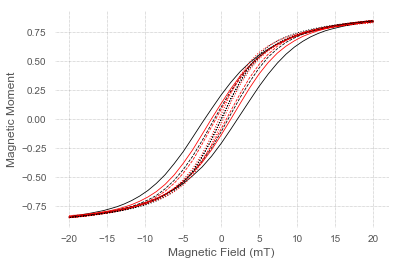

In [216]:
fig, ax = pl.subplots()

ax.plot(field_avg,k_data_avg[0,:,5], linestyle = '-', color='black',lw=0.8)
ax.plot(field_avg,k_data_avg[1,:,5], linestyle = '-', color='red',lw=0.8)
ax.plot(field_avg,k_data_avg[2,:,5], linestyle = 'dashed', color='black',lw=0.8)
ax.plot(field_avg,k_data_avg[3,:,5], linestyle = 'dashed', color='red',lw=0.8)
ax.plot(field_avg,k_data_avg[10,:,5], linestyle = 'dotted', color='black',lw=1)
ax.plot(field_avg,k_data_avg[19,:,5], linestyle = 'dotted', color='red',lw=1)
legend = ax.legend(['1','5','9','13','17','20'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ax.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax.set_facecolor('white')
show()

### Matching to data

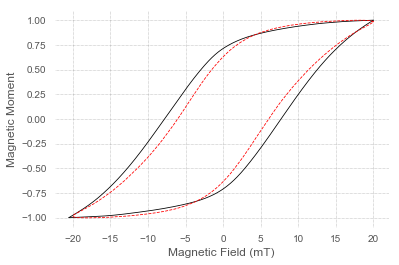

In [203]:
fig, ax = pl.subplots()

ax.plot(20*AT99[:,0]/np.max(AT99[:,0]),AT99[:,2], linestyle = '-', color='black',lw=0.8)
ax.plot(20*AT99[:,3]/np.max(AT99[:,3]),AT99[:,5], linestyle = '-', color='black',lw=0.8)
ax.plot(field,k_data[16,:,0]/np.max(k_data[16,:,0]), linestyle = 'dashed', color='red',lw=0.8)
ax.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax.set_facecolor('white')
show()

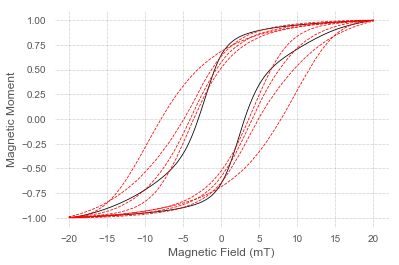

In [368]:
fig, ax = pl.subplots()

ax.plot(20*AT133[:,0]/np.max(AT133[:,0]),AT133[:,2], linestyle = '-', color='black',lw=0.8)
ax.plot(20*AT133[:,3]/np.max(AT133[:,3]),AT133[:,5], linestyle = '-', color='black',lw=0.8)
#ax.plot(field,k_data[14,:,0]/np.max(k_data[14,:,0]), linestyle = 'dashed', color='red',lw=0.8)

ax.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax.set_facecolor('white')
show()

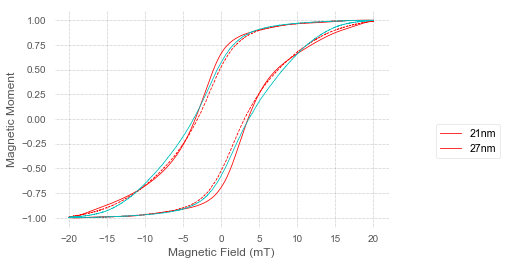

In [589]:
fig, ax = pl.subplots()

#ax.plot(20*A_MH[:,0]/np.max(A_MH[:,0]),A_MH[:,2], linestyle = '-', color='black',lw=0.8)
ax.plot(20*B_MH[:,0]/np.max(B_MH[:,0]),B_MH[:,2], linestyle = '-', color='red',lw=0.8)
#ax.plot(20*A_MH[:,3]/np.max(A_MH[:,3]),A_MH[:,5], linestyle = '-', color='black',lw=0.8)
ax.plot(20*B_MH[:,3]/np.max(B_MH[:,3]),B_MH[:,5], linestyle = '-', color='red',lw=0.8)

#ax.plot(field,k_data[15,:,23]/np.max(k_data[15,:,23]), linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(field,k_data[6,:,24]/np.max(k_data[6,:,24]), linestyle = 'dashed', color='red',lw=0.8)
#ax.plot(field,k_data[19,:,12]/np.max(k_data[19,:,12]), linestyle = 'dashed', color='black',lw=0.8)
#ax.plot(field,k_data[3,:,9]/np.max(k_data[3,:,9]), linestyle = 'dashed', color='red',lw=0.8)
#ax.plot(field,k_data[2,:,5]/np.max(k_data[2,:,5]), linestyle = 'dashed', color='m',lw=0.8)
#ax.plot(field,data[:,13]/np.max(data[:,13]), linestyle = 'dashed', color='red',lw=0.8)

#with new K/g data
#ax.plot(field,k_data[10,:,16]/np.max(k_data[10,:,16]), linestyle = 'dashed', color='red',lw=0.8)
#ax.plot(field,k_data[17,:,12]/np.max(k_data[17,:,12]), linestyle = 'dashed', color='black',lw=0.8)

#best fit
#ax.plot(field,k_data[7,:,25]/np.max(k_data[7,:,25]), linestyle = 'dashed', color='black',lw=0.8)
ax.plot(field,k_data[10,:,36]/np.max(k_data[10,:,36]), linestyle = 'dashed', color='red',lw=0.8)
ax.plot(field,k_data[7,:,34]/np.max(k_data[7,:,34]), linestyle = '-', color='c',lw=0.8)
#ax.plot(field,k_data[10,:,35]/np.max(k_data[10,:,35]), linestyle = '-', color='m',lw=0.8)


legend = ax.legend(['21nm','27nm'],frameon=1, fontsize=10.5, 
                   bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_facecolor('white')
ax.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax.set_facecolor('white')
show()

In [327]:
Kb = -12000
Ks = 3.9e-5
D = 21.9e-9
K = Kb - 6*Ks/D
print(K)

-22684.931506849316


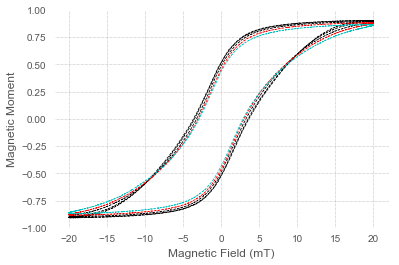

In [577]:
fig, ax = pl.subplots()

ax.plot(field,k_data[0,:,36], linestyle = 'dashed', color='black',lw=0.8)
ax.plot(field,k_data[4,:,36], linestyle = 'dashed', color='black',lw=0.8)
ax.plot(field,k_data[8,:,36], linestyle = 'dashed', color='black',lw=0.8)
ax.plot(field,k_data[12,:,36], linestyle = 'dashed', color='red',lw=0.8)
ax.plot(field,k_data[16,:,36], linestyle = 'dashed', color='c',lw=0.8)

ax.set_ylabel('Magnetic Moment')
xlabel('Magnetic Field (mT)')
ax.set_axisbelow(True)
ax.tick_params(which='major', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
ax.grid(which = "major",lw=0.5,color="gray",linestyle="dotted")
ax.set_facecolor('white')
show()